In [723]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

def mkSignal(dir, n, noise, d):
    return np.exp(2.0j * np.pi * d * np.sin(dir) * np.arange(n) ) +  2.0 * noise * ( (np.random.rand(n) - 0.5) + 1.0j * (np.random.rand(n)) - 0.5) # random erzeugt irgendwas zwischen 0 und 1

def mkSteer(dat, d):
    n = np.size(dat)
    bf = np.array([ np.sum(dat * np.exp(-2.0j * np.pi * d * np.sin(dir) * np.arange(n) )) for dir in (np.arange(180) - 90) / 180.0 * np.pi ])
    return bf

def calcDiff(dir, n = 16, d=0.45, noise=0.001, dPhi=3):
    res = (np.abs(mkSteer(mkSignal(dir=dir,n=n, d=d, noise=noise) *np.hanning(16), d = d))) 
    xs = np.arange(180)
    m = np.argmax(res)
    return (np.sum(xs[m-dPhi:m+dPhi+1] *  res[m-dPhi:m+dPhi+1]) / np.sum(res[m-dPhi:m+dPhi+1]) - 90.0)


def calcDiffGauss(dir, n = 16, d=0.45, noise=0.001, dPhi = 3):
    res = (np.abs(mkSteer(mkSignal(dir=dir,n=n, d=d, noise=noise) *np.hanning(16), d = d)))
    xs = np.arange(180) - 90
    m = np.argmax(res)

    def Gauss(x, A, B, C, p0=[8.0,1.0,xs[m],1.0]): 
        y= A*np.exp(-1*B*(x-C)**2)
        #y= A*np.sinc(B*(x-C)/np.pi)
        return y 

    parameters, covariance = curve_fit(Gauss, xs[m-dPhi:m+dPhi+1], res[m-dPhi:m+dPhi+1], bounds=([5,0.0, xs[m]-1], [9,1.0, xs[m]+1]) )
    

    return parameters[2]

    

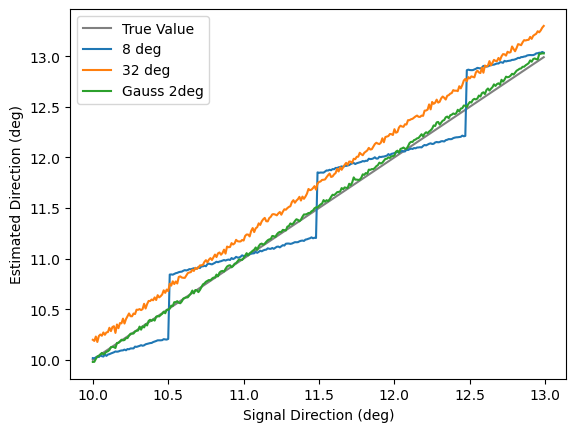

In [724]:
xs = np.arange(300)/100 + 10.0

diff8 = np.array([ calcDiff(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi = 8)  for dir in xs ])
diff12 = np.array([ calcDiff(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi = 12)  for dir in xs ])
diff16 = np.array([ calcDiff(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi = 16)  for dir in xs ])
diff32 = np.array([ calcDiff(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi = 32)  for dir in xs ])
diffGauss = np.array([ calcDiffGauss(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi=2)  for dir in xs ])

plt.plot(xs, xs, color='grey', label="True Value")
plt.plot(xs, diff8, label='8 deg')
#plt.plot(xs, diff12, label='12 deg')
#plt.plot(xs, diff16, label='16 deg')
plt.plot(xs, diff32, label='32 deg')
plt.plot(xs, diffGauss, label='Gauss 2deg')
plt.xlabel("Signal Direction (deg)")
plt.ylabel("Estimated Direction (deg)")
plt.legend()
plt.show()

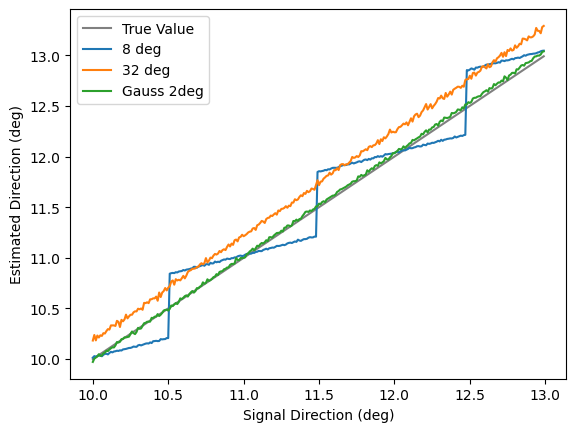

In [725]:
xs = np.arange(300)/100 + 10.0

diff8 = np.array([ calcDiff(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi = 8)  for dir in xs ])
diff12 = np.array([ calcDiff(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi = 12)  for dir in xs ])
diff16 = np.array([ calcDiff(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi = 16)  for dir in xs ])
diff32 = np.array([ calcDiff(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi = 32)  for dir in xs ])
diffGauss = np.array([ calcDiffGauss(dir/180.0*np.pi, d=0.45, noise=0.01, n=16, dPhi=2)  for dir in xs ])

plt.plot(xs, xs, color='grey', label="True Value")
plt.plot(xs, diff8, label='8 deg')
#plt.plot(xs, diff12, label='12 deg')
#plt.plot(xs, diff16, label='16 deg')
plt.plot(xs, diff32, label='32 deg')
plt.plot(xs, diffGauss, label='Gauss 2deg')
plt.xlabel("Signal Direction (deg)")
plt.ylabel("Estimated Direction (deg)")
plt.legend()
plt.show()